In [118]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

In [119]:
IMG_SIZE = (192, 192)
BATCH_SIZE = 16

# Create ImageDataGenerators for training, validation, and test datasets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Increase rotation range
    width_shift_range=0.2,  # Increase shift range
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,  # Increase zoom range
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Add brightness augmentation
    fill_mode='nearest'
)


val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load the datasets
train_generator = train_datagen.flow_from_directory(
    'Training',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    'Validation',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    'Testing',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    classes = ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']

)

Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


Training Dataset:


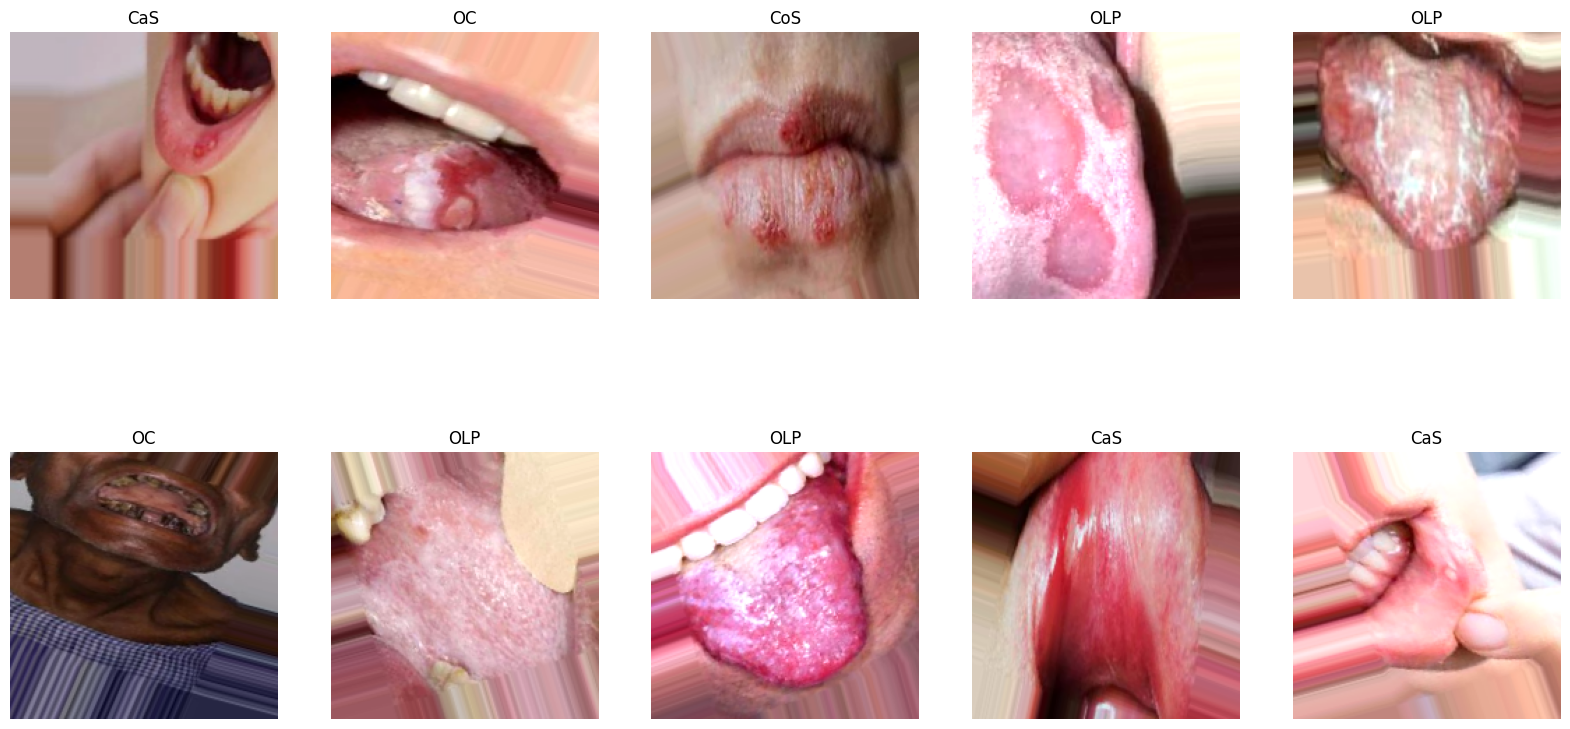


Validation Dataset:


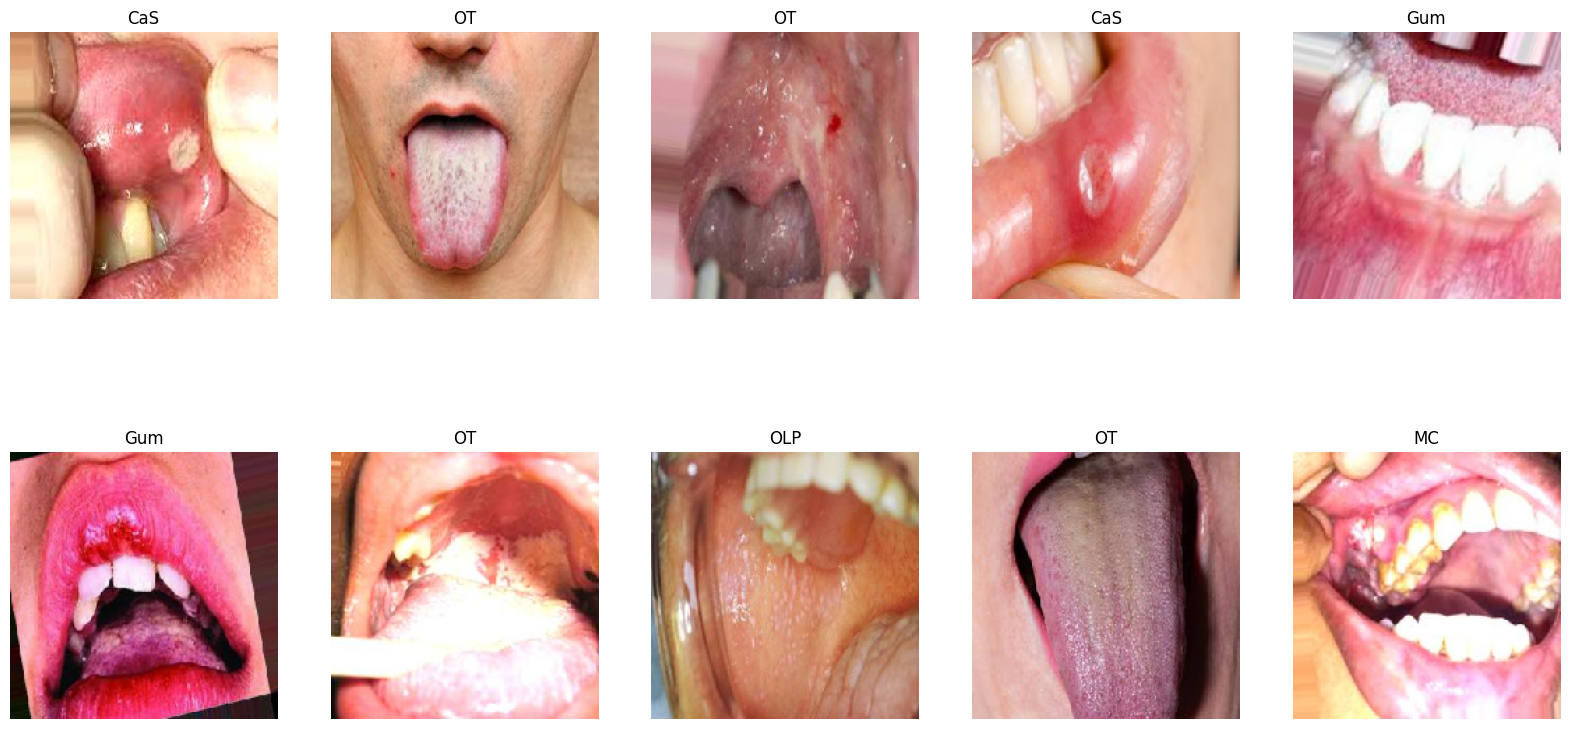


Testing Dataset:


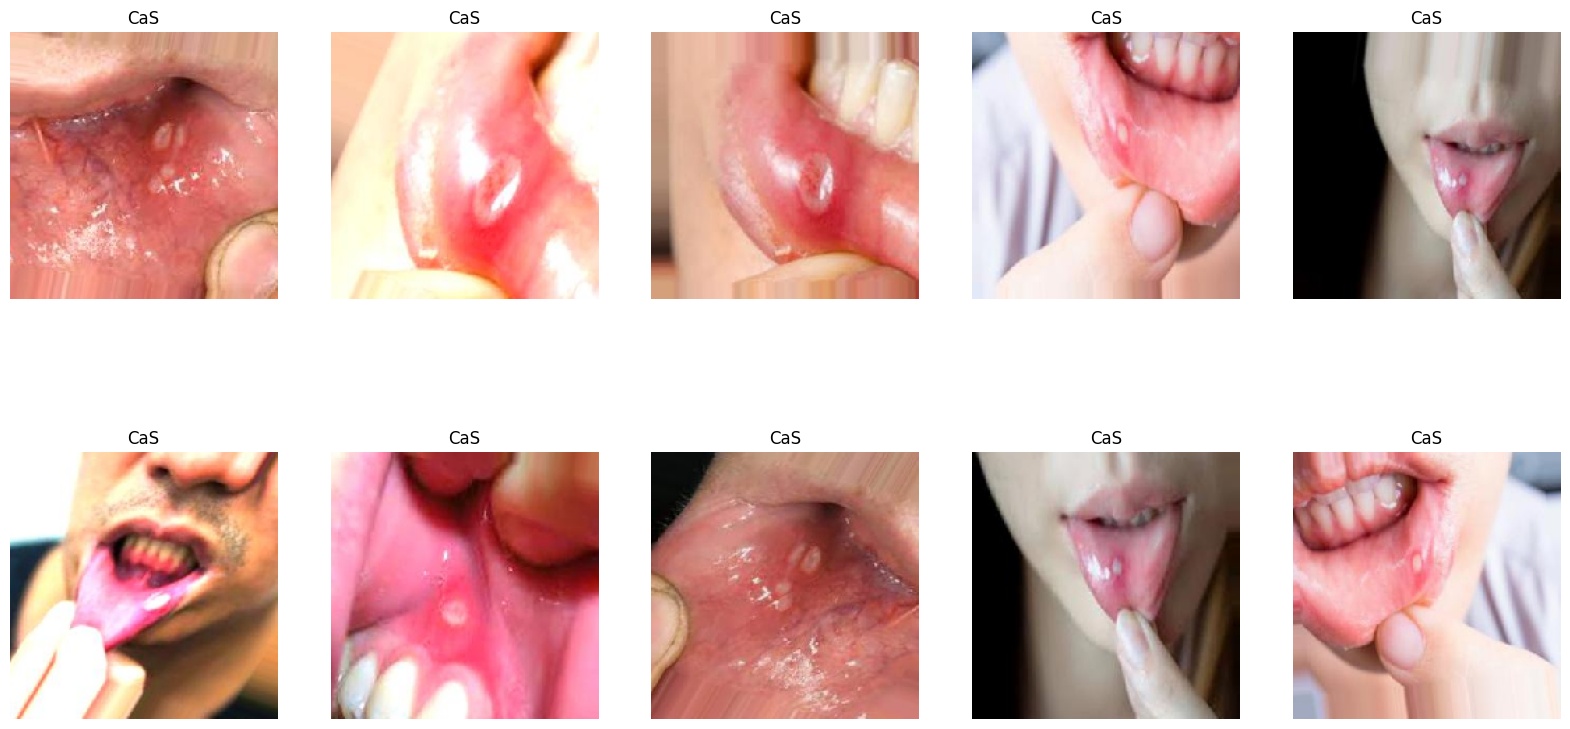

In [120]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_samples(generator, n_samples=10):
    """Visualizes a random sample of images from a data generator."""
    images, labels = next(generator)  # Get a batch of images and labels
    indices = np.random.choice(range(len(images)), n_samples, replace=False)

    class_labels = list(generator.class_indices.keys())

    plt.figure(figsize=(20, 10))
    for i, idx in enumerate(indices):
        ax = plt.subplot(2, n_samples // 2, i + 1)
        plt.imshow(images[idx])
        label = class_labels[np.argmax(labels[idx])]
        plt.title(label)
        plt.axis("off")

    plt.show()

# Visualize 10 samples from the training, validation, and testing datasets
print("Training Dataset:")
visualize_samples(train_generator, n_samples=10)
print("\nValidation Dataset:")
visualize_samples(val_generator, n_samples=10)
print("\nTesting Dataset:")
visualize_samples(test_generator, n_samples=10)


Training Data Augmentation:


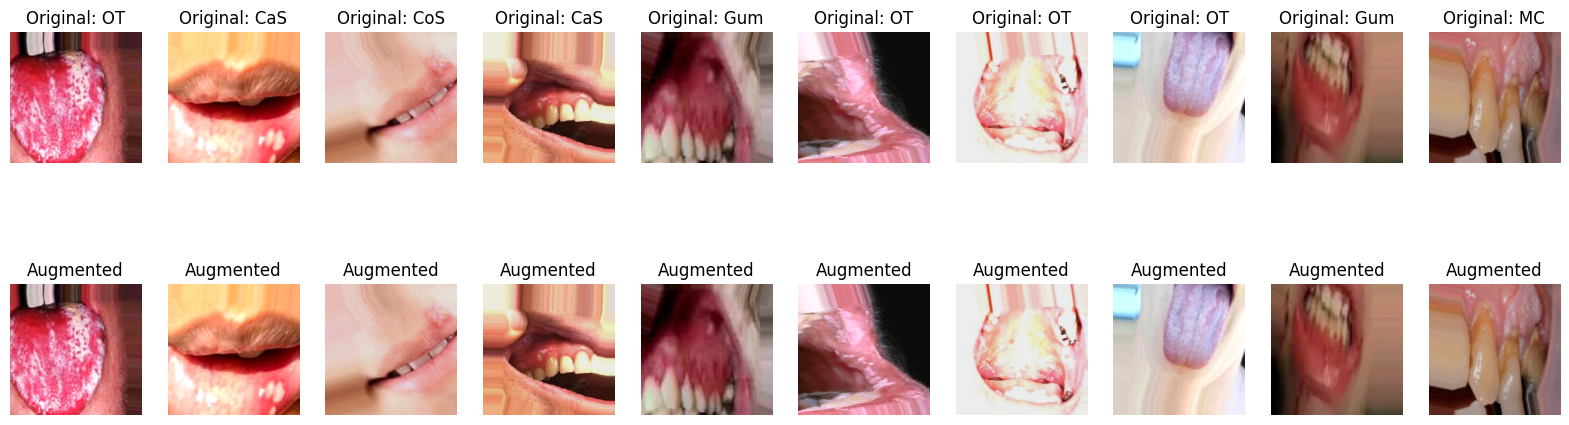

Validation Data Augmentation:


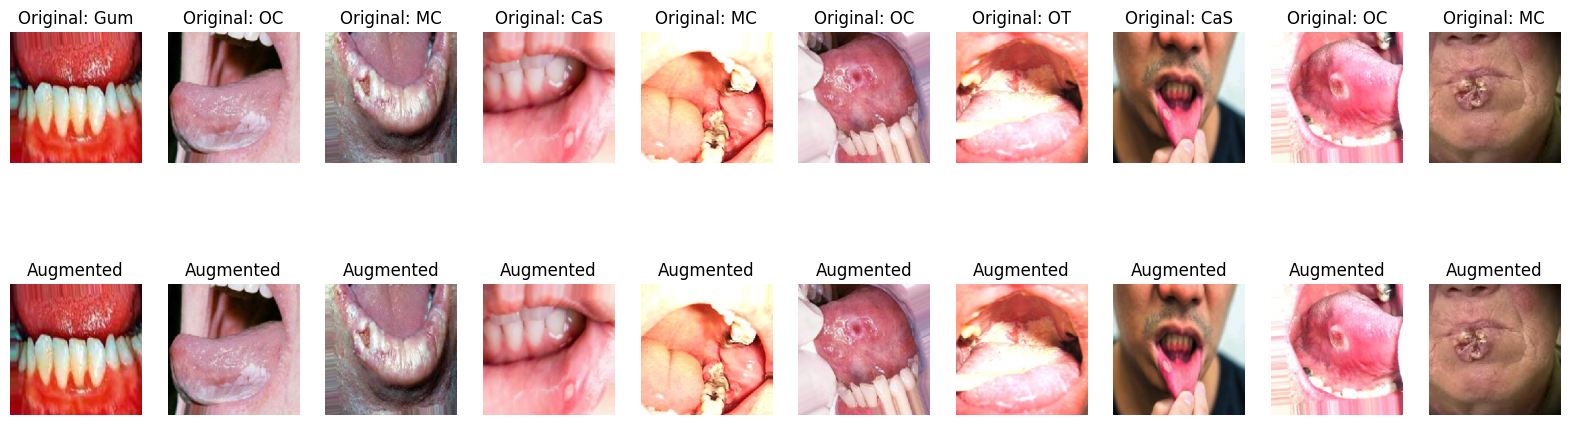

Testing Data Augmentation:


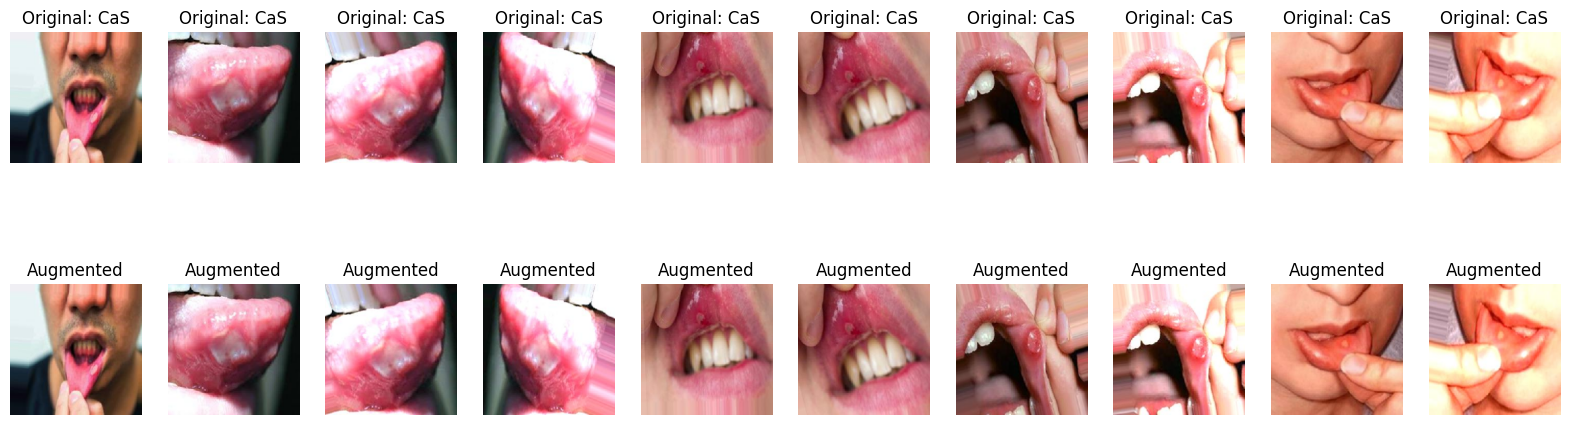

In [121]:
import numpy as np

def show_augmented_images(generator, n_images=10):
    images, labels = next(generator)

    fig, axes = plt.subplots(2, n_images, figsize=(20, 6))
    for i in range(n_images):
        # Original image
        axes[0, i].imshow(images[i])
        axes[0, i].set_title(f'Original: {list(generator.class_indices.keys())[np.argmax(labels[i])]}')
        axes[0, i].axis('off')

        # Augmented image (same as original here since we're showing the augmented data)
        axes[1, i].imshow(images[i])
        axes[1, i].set_title('Augmented')
        axes[1, i].axis('off')

    plt.show()

# Show augmented images for training, validation, and testing datasets
print("Training Data Augmentation:")
show_augmented_images(train_generator)

print("Validation Data Augmentation:")
show_augmented_images(val_generator)

print("Testing Data Augmentation:")
show_augmented_images(test_generator)


In [122]:
from tensorflow.keras.optimizers import Adam
model = Sequential([
    tf.keras.Input((192, 192, 3)),
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(1/16),
    Dense(128, activation='relu'),
    Dropout(1/16),

    # Output Layer
    Dense(7, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_82 (Conv2D)                   │ (None, 190, 190, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_76 (MaxPooling2D)      │ (None, 95, 95, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 93, 93, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_77 (MaxPooling2D)      │ (None, 46, 46, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_84 (Conv2D)                   │ (None, 44, 44, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_78 (MaxPooling2D)      │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_85 (Conv2D)                   │ (None, 20, 20, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_79 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_21 (Flatten)                 │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 256)                 │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,696,983 (6.47 MB)

 Trainable params: 1,696,983 (6.47 MB)

 Non-trainable params: 0 (0.00 B)

In [123]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [124]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
callbacks = [early_stopping]

In [125]:
# Training the model
history = model.fit(
    train_generator,                # Training data generator
    validation_data=val_generator,  # Validation data generator
    epochs=60,                      # Number of epochs to train
    callbacks=callbacks,            # Any callbacks you want to use (like EarlyStopping, ModelCheckpoint, etc.
)

Epoch 1/60
193/193 ━━━━━━━━━━━━━━━━━━━━ 36s 169ms/step - accuracy: 0.1886 - loss: 1.9218 - val_accuracy: 0.2899 - val_loss: 1.7214
Epoch 2/60
193/193 ━━━━━━━━━━━━━━━━━━━━ 33s 166ms/step - accuracy: 0.3033 - loss: 1.7037 - val_accuracy: 0.3628 - val_loss: 1.5870
Epoch 3/60
193/193 ━━━━━━━━━━━━━━━━━━━━ 34s 169ms/step - accuracy: 0.3271 - loss: 1.6621 - val_accuracy: 0.3930 - val_loss: 1.5036
Epoch 4/60
193/193 ━━━━━━━━━━━━━━━━━━━━ 34s 170ms/step - accuracy: 0.3552 - loss: 1.6023 - val_accuracy: 0.3862 - val_loss: 1.4794
Epoch 5/60
193/193 ━━━━━━━━━━━━━━━━━━━━ 33s 168ms/step - accuracy: 0.3866 - loss: 1.5382 - val_accuracy: 0.4251 - val_loss: 1.4910
Epoch 6/60
193/193 ━━━━━━━━━━━━━━━━━━━━ 33s 166ms/step - accuracy: 0.4109 - loss: 1.4971 - val_accuracy: 0.4737 - val_loss: 1.3724
Epoch 7/60
193/193 ━━━━━━━━━━━━━━━━━━━━ 33s 168ms/step - accuracy: 0.4440 - loss: 1.4132 - val_accuracy: 0.5214 - val_loss: 1.2369
Epoch 8/60
193/193 ━━━━━━━━━━━━━━━━━━━━ 33s 169ms/step - accuracy: 0.4412 - loss: 1

In [126]:
loss, accuracy = model.evaluate(test_generator)

# Print the results
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.9664 - loss: 0.0871
Test Loss: 0.1076
Test Accuracy: 0.9630


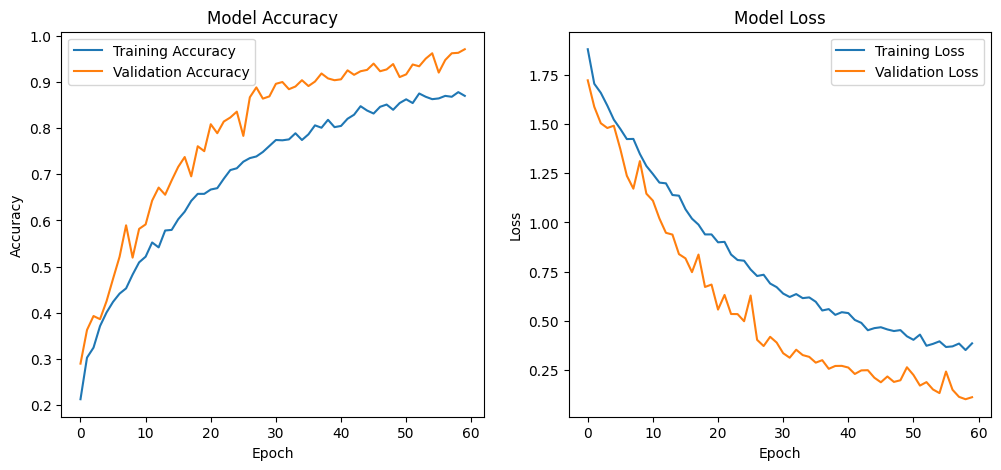

In [127]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Display the plots
plt.show()